## Goal of this Notebook 

* take a deep dive into the stats of this data

In [1]:
# importing all import libraries to be used

import pandas as pd 
import seaborn as sns

In [2]:
# debug -- checking for working directory
import os
print(os.getcwd())

/Users/csuser/Masters2026/Data_Analysis_Project/Supplement-Sales/notebooks


In [3]:
df = pd.read_csv("../data/raw/Supplement_Sales_Weekly_Expanded.csv")
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [5]:
# need to convert Date to datetime object for future uses i.e.. time series or rolling averages
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
# snapshot of the data using the .descirbe  method
df.describe(include="all")

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
count,4384,4384,4384,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000,4384,4384
unique,NaN,16,10,NaN,NaN,NaN,NaN,NaN,3,3
top,NaN,Whey Protein,Vitamin,NaN,NaN,NaN,NaN,NaN,Canada,iHerb
freq,NaN,274,822,NaN,NaN,NaN,NaN,NaN,1507,1499
mean,2022-08-18 12:00:00,NaN,NaN,150.200274,34.781229,5226.569446,0.124398,1.531478,NaN,NaN
min,2020-01-06 00:00:00,NaN,NaN,103.000000,10.000000,1284.000000,0.000000,0.000000,NaN,NaN
25%,2021-04-26 00:00:00,NaN,NaN,142.000000,22.597500,3349.372500,0.060000,1.000000,NaN,NaN
50%,2022-08-18 12:00:00,NaN,NaN,150.000000,34.720000,5173.140000,0.120000,1.000000,NaN,NaN
75%,2023-12-11 00:00:00,NaN,NaN,158.000000,46.712500,7009.960000,0.190000,2.000000,NaN,NaN
max,2025-03-31 00:00:00,NaN,NaN,194.000000,59.970000,10761.850000,0.250000,8.000000,NaN,NaN


In [7]:
# going to look into more information by 'Category' in the data
# first will look units sold by category
# average mean / number of units sold per category

import matplotlib.pyplot as plt

avg_units = df.groupby("Category")["Units Sold"].mean().sort_values(ascending=False)
avg_units

Category
Herbal         151.124088
Omega          150.821168
Performance    150.589416
Mineral        150.447689
Sleep Aid      150.237226
Vitamin        150.163017
Hydration      149.872263
Protein        149.854015
Amino Acid     149.733577
Fat Burner     148.697080
Name: Units Sold, dtype: float64

In [8]:
# checking the amount of values of each supplements:
df["Category"].value_counts()


Category
Vitamin        822
Mineral        822
Protein        548
Performance    548
Omega          274
Amino Acid     274
Herbal         274
Sleep Aid      274
Fat Burner     274
Hydration      274
Name: count, dtype: int64

In [9]:
# From this understanding - there are more of one category but checking 
# if its undersampled in the data
# Is there a category that’s frequent but performs poorly? (→ might need review)
# Is there a rare category that performs well? (→ maybe needs marketing push?)


df_1 = pd.DataFrame({
    "Category": ["Vitamin", "Mineral", "Protein", "Performance", "Omega", "Amino Acid", "Herbal", "Sleep Aid", "Fat Burner", "Hydration"],
    "Count": [822, 822, 548, 548, 274, 274, 274, 274, 274, 274],
    "Avg Units Sold": [150.163017, 150.447689, 149.854015, 150.589416, 150.821168, 149.733577, 151.124088, 150.237226, 148.697080, 149.872263]
})

df_1


,Category,Count,Avg Units Sold
0,Vitamin,822,150.163017
1,Mineral,822,150.447689
2,Protein,548,149.854015
3,Performance,548,150.589416
4,Omega,274,150.821168
5,Amino Acid,274,149.733577
6,Herbal,274,151.124088
7,Sleep Aid,274,150.237226
8,Fat Burner,274,148.697080
9,Hydration,274,149.872263


In [10]:
# checking z - score 
# Z-score ≈ 0 → near average
# Z-score > 1 → significantly above average (either high count or strong sales)
# Z-score < -1 → significantly below average
from scipy.stats import zscore

df_1["Z-Score (Count)"] = zscore(df_1["Count"])
df_1["Z-Score (Avg Units Sold)"] = zscore(df_1["Avg Units Sold"])

df_1


,Category,Count,Avg Units Sold,Z-Score (Count),Z-Score (Avg Units Sold)
0,Vitamin,822,150.163017,1.75,0.014089
1,Mineral,822,150.447689,1.75,0.456639
2,Protein,548,149.854015,0.50,-0.466283
3,Performance,548,150.589416,0.50,0.676967
4,Omega,274,150.821168,-0.75,1.037247
5,Amino Acid,274,149.733577,-0.75,-0.653515
6,Herbal,274,151.124088,-0.75,1.508164
7,Sleep Aid,274,150.237226,-0.75,0.129454
8,Fat Burner,274,148.697080,-0.75,-2.264847
9,Hydration,274,149.872263,-0.75,-0.437915


/var/folders/4_/bjg3p3m57cvg75xsyv2k50pw0000gp/T/ipykernel_76161/753733891.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_1["Category"], rotation=45)


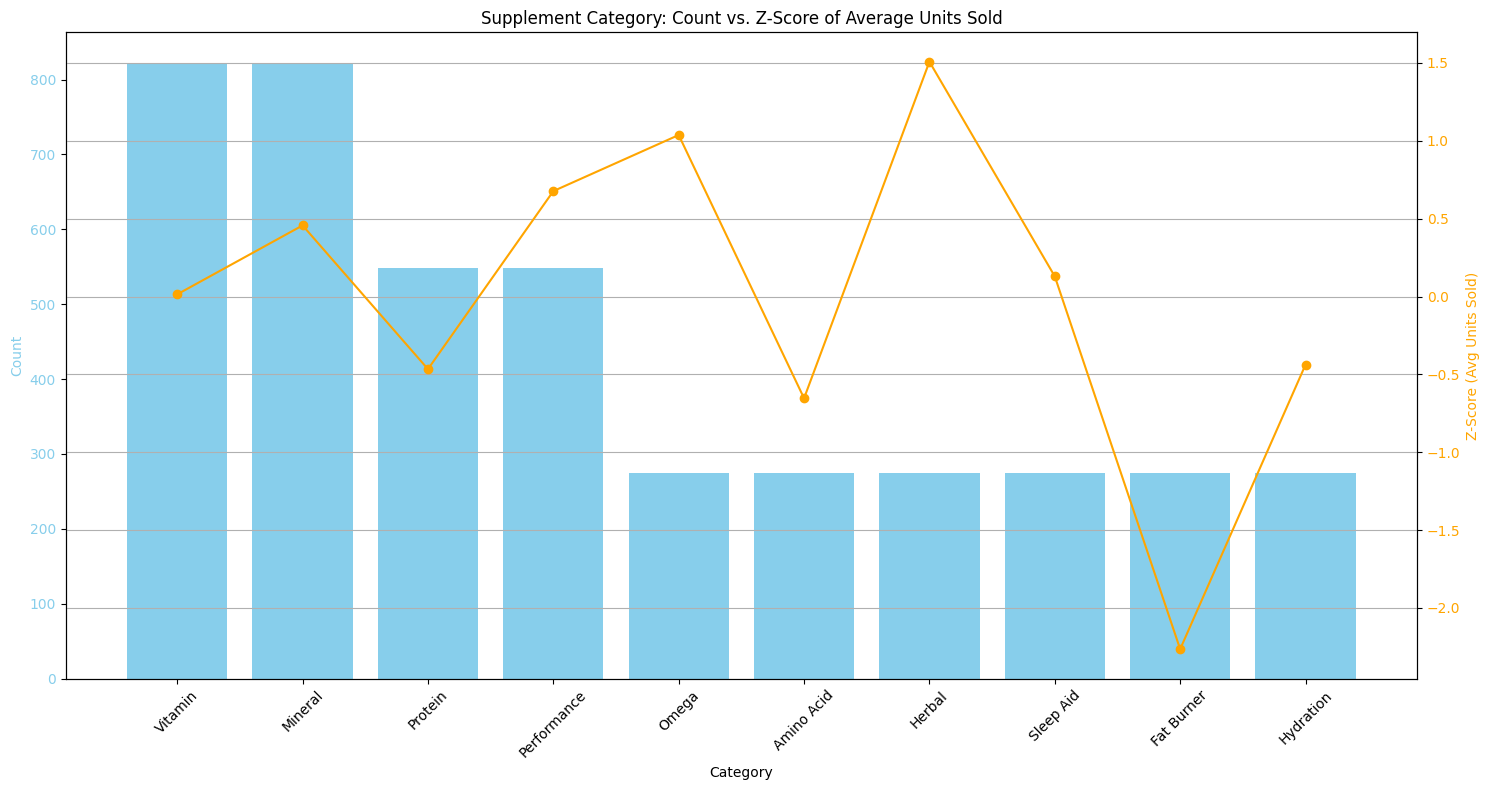

In [11]:
# plotting the zscore on chart w(bar chart and line chart on second axis)
fig, ax1 = plt.subplots(figsize=(15, 8))


ax1.bar(df_1["Category"], df_1["Count"], color='skyblue', label='Count')
ax1.set_xlabel("Category")
ax1.set_ylabel("Count", color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(df_1["Category"], rotation=45)

# Line chart for z-score on second axis
ax2 = ax1.twinx()
ax2.plot(df_1["Category"], df_1["Z-Score (Avg Units Sold)"], color='orange', marker='o', label='Z-Score (Avg Units Sold)')
ax2.set_ylabel("Z-Score (Avg Units Sold)", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title("Supplement Category: Count vs. Z-Score of Average Units Sold")
fig.tight_layout()
plt.grid(True)
plt.show()

* Takeaways from this chart

- Categories like "Vitamin" and "Mineral" are appearing far most often than others, despite being more frequent does not appear to out perform other categories in this dataset. 
- Herbal and Omega with lower count in the dataset has a higher z score in the dataset, consistently selling more units?? maybe MLM incentivised to sell more?? maybe the market is different? Should I keep these in my dataset since the market for selling Herbal and Omega might be way different than these other markets?


Note: While Herbal appears to be a high-performing category, it's possible these are influenced by MLM dynamics (e.g., Herbalife), where sales patterns are not representative of organic e-commerce behavior. For business decisions or modeling purposes, this category may be excluded or flagged as a separate channel.



* Looking into Missing DataPoints


In [12]:
df.isnull().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

Note: No missing or duplicate items in the dataset

## Value Counts of Categorical Columns

-- checking for any imbalance in columns

In [14]:
df['Location'].value_counts()

Location
Canada    1507
UK        1475
USA       1402
Name: count, dtype: int64

In [15]:
df['Platform'].value_counts()

Platform
iHerb      1499
Amazon     1473
Walmart    1412
Name: count, dtype: int64

* Evaluating this dataset, that there is a good distribution between Platform seeling from and the location of the goods
* (Canada, Uk, USA)

## Correlation Matrix (Numerical Only)

* checking linear assosiations i.e checking strong relationships between columns

<Axes: >

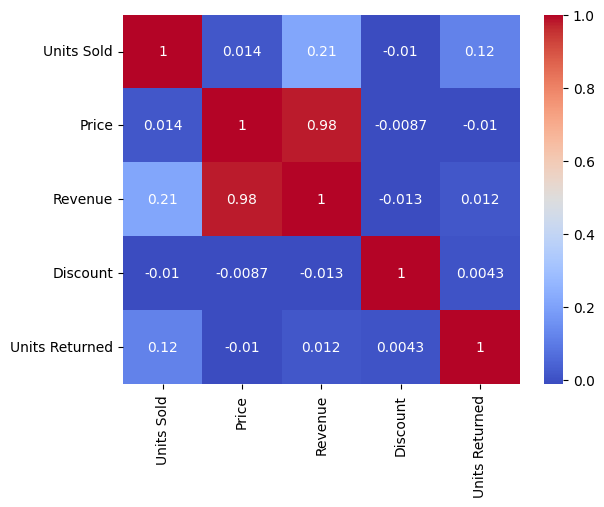

In [16]:
import seaborn as sns
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

* From this chart I see that there is a strong relationship between "Price" and "Revenue" which makes sense, with a threshold of .98.
* Revenue = Units × Price, so price heavily influences it.
* Also, there is a small but noticeable relationship between "Units Sold" and "Revenue" ( positive relationship)
* Units Returned shows slight correlation with Units Sold (0.12) → Makes sense; more sold → more returned.

### Category-Specific Correlation
Group by Category, compute correlation matrices per category.
This may reveal that certain categories behave differently — e.g., discounts affect performance products but not vitamins.

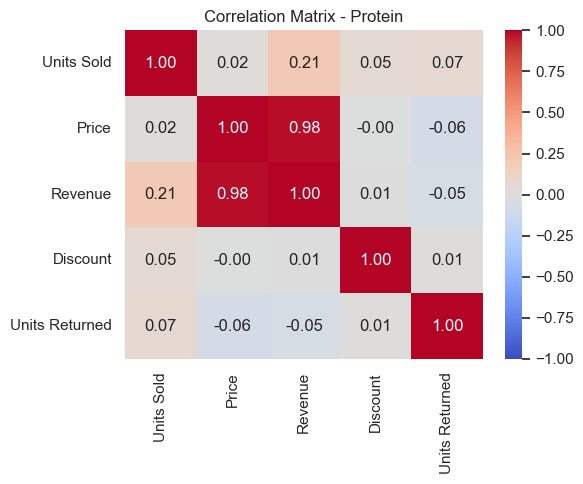

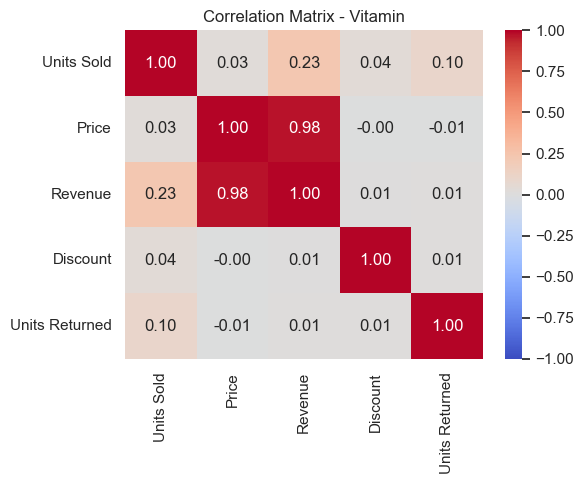

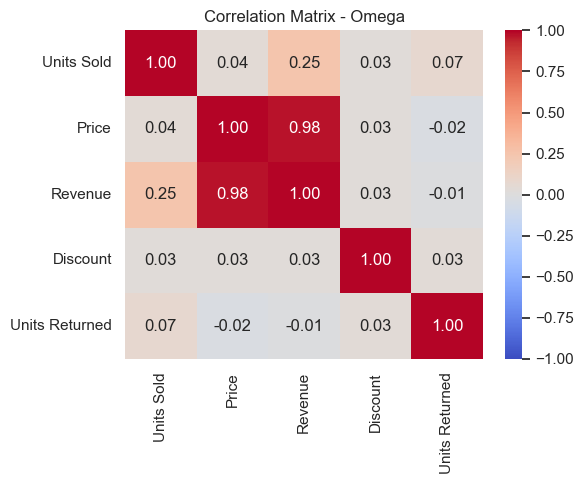

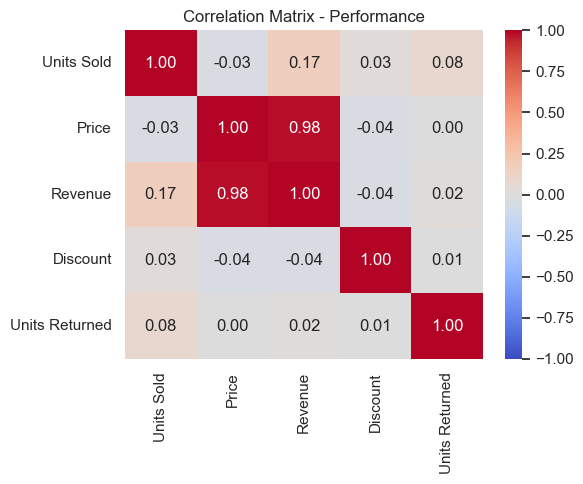

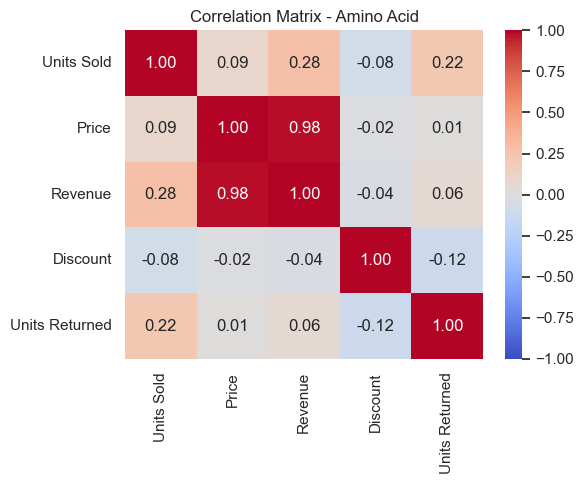

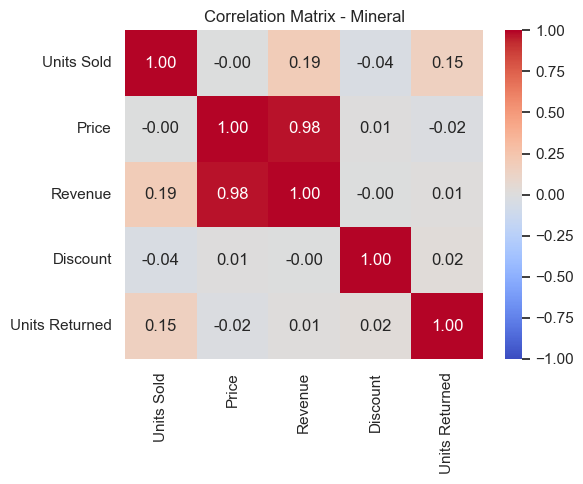

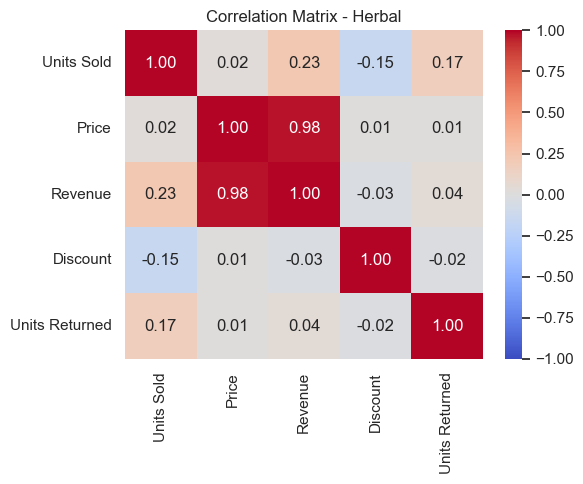

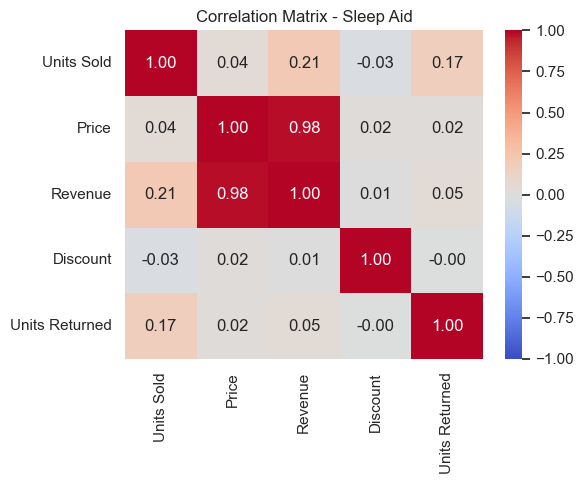

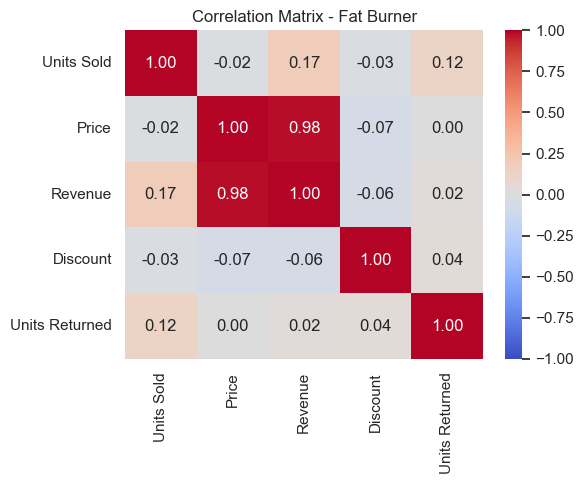

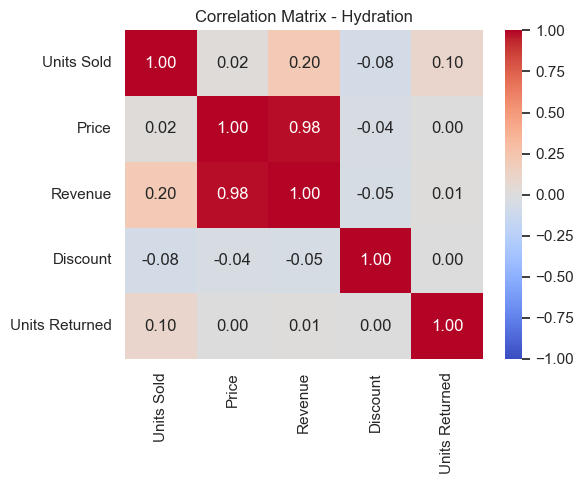

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




sns.set(style="whitegrid")

# Loop through each category and plot correlation heatmap
for category in df['Category'].unique():
    subset = df[df['Category'] == category]
    corr = subset.corr(numeric_only=True)

    plt.figure(figsize=(6, 5))
    sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
    plt.title(f'Correlation Matrix - {category}')
    plt.tight_layout()
    plt.show()

Notes:
* This chart shows that by Category there is small changes in relationship strength but all pointing to the same outcomes being,
* Unites sold is string correlation to Revenue. 

### Revenue Drivers per Category (Multivariate)
Run a multiple regression: Revenue ~ Price + Units Sold + Discount + Platform
This will help quantify the contribution of each variable to revenue generation.



In [19]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 36.6 MB/s eta 0:00:0031m35.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] 1/2 [statsmodels]


In [23]:
df['Platform'].value_counts()

Platform
iHerb      1499
Amazon     1473
Walmart    1412
Name: count, dtype: int64

In [24]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


df_encoded = pd.get_dummies(df, columns=['Platform'], drop_first=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              4384 non-null   datetime64[ns]
 1   Product Name      4384 non-null   object        
 2   Category          4384 non-null   object        
 3   Units Sold        4384 non-null   int64         
 4   Price             4384 non-null   float64       
 5   Revenue           4384 non-null   float64       
 6   Discount          4384 non-null   float64       
 7   Units Returned    4384 non-null   int64         
 8   Location          4384 non-null   object        
 9   Platform_Walmart  4384 non-null   bool          
 10  Platform_iHerb    4384 non-null   bool          
dtypes: bool(2), datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 316.9+ KB


In [26]:
for category in df_encoded['Category'].unique():
    subset = df_encoded[df_encoded['Category'] == category].copy()

    # Ensure dummy columns are numeric (not bool)
    for col in subset.columns:
        if subset[col].dtype == 'bool':
            subset[col] = subset[col].astype(int)

    # Define independent variables (X) and dependent variable (y)
    X_cols = ['Price', 'Units Sold', 'Discount'] + [col for col in subset.columns if col.startswith('Platform_')]
    X = subset[X_cols]
    y = subset['Revenue']

    # Add constant term for intercept
    X = sm.add_constant(X)

    # Fit OLS regression model
    model = sm.OLS(y, X).fit()

    print(f"\n=== Regression Summary for Category: {category} ===")
    print(model.summary())


=== Regression Summary for Category: Protein ===
                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.824e+04
Date:                Mon, 21 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:06:05   Log-Likelihood:                -3585.5
No. Observations:                 548   AIC:                             7183.
Df Residuals:                     542   BIC:                             7209.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [27]:
results = []

for category in df_encoded['Category'].unique():
    subset = df_encoded[df_encoded['Category'] == category].copy()

    for col in subset.columns:
        if subset[col].dtype == 'bool':
            subset[col] = subset[col].astype(int)

    X_cols = ['Price', 'Units Sold', 'Discount'] + [col for col in subset.columns if col.startswith('Platform_')]
    X = subset[X_cols]
    y = subset['Revenue']
    X = sm.add_constant(X)
    
    model = sm.OLS(y, X).fit()
    params = model.params
    pvalues = model.pvalues

    for var in params.index:
        results.append({
            'Category': category,
            'Variable': var,
            'Coefficient': params[var],
            'P-Value': pvalues[var]
        })

df_results = pd.DataFrame(results)

In [30]:
significant = df_results[(df_results['P-Value'] < 0.05) & (df_results['Variable'] != 'const')]

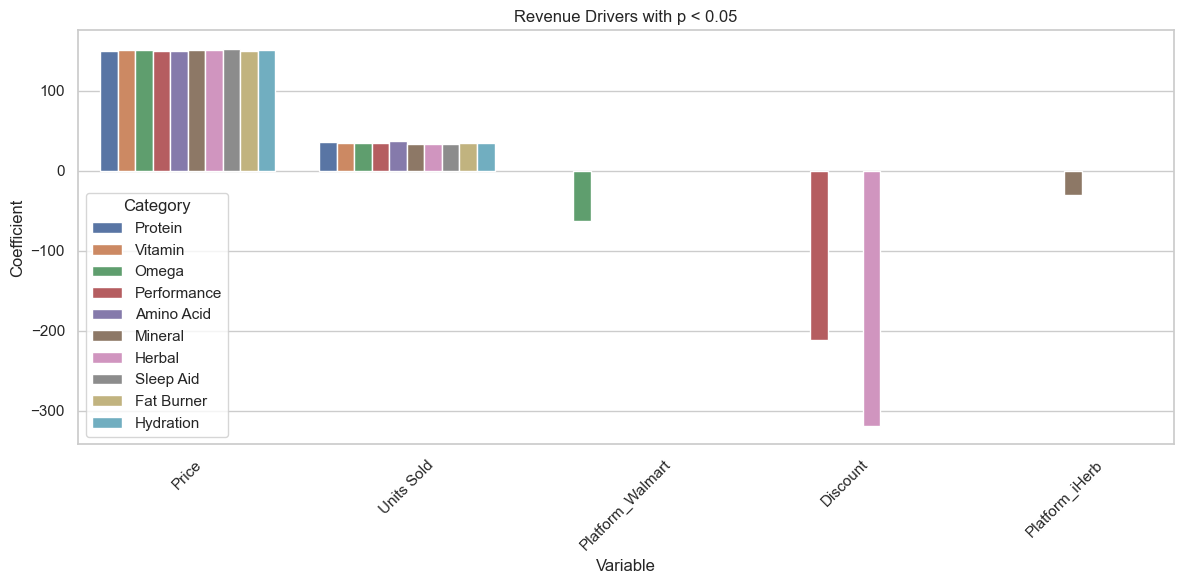

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=significant, x='Variable', y='Coefficient', hue='Category')
plt.title("Revenue Drivers with p < 0.05")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight	Business Action**
Price is the top driver	Avoid unnecessary discounts unless elasticity is proven
Herbal & Performance: avoid discounting	Consider bundling, not price cuts
Optimize by platform	Use Amazon for Omega; avoid iHerb for Mineral
Category-specific playbooks	Don’t generalize price/discount strategy across categories

### Elasticity Exploration
Price Elasticity of Demand = % change in quantity / % change in price

Group by product and compute how price changes affect units sold over time

### Return Rate Analysis
Create a new feature: Return Rate = Units Returned / Units Sold
Check if some categories or platforms have disproportionate return rates, and if that correlates with Discount, Price, or Platform.

### Time Series Breakdown
Plot average weekly revenue, units sold, price per category.

Look for seasonality or spikes that might explain performance.

##  Distribution Plots for Key Metrics
* skew, outliers, and zero-inflation (many weeks might have 0 sales)

## Grouped Aggregations

* “who’s winning where” — helps target future modeling 

## Time-Series Aggregations
*  See trends, seasonality, and potential anomalies

##  Statistical Tests
* “Is the difference in revenue statistically significant, or just noise?”

## Feature Engineering Prep
* what can drive the ML better?
* rolling average?
* Return rate?
* Discounted price?